In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv


**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

**Loading Data**

In [3]:
data = pd.read_csv("/kaggle/input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


**Exploratory Data Analysis**

In [5]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
data.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,...,1,80,0,6,3,4,4,3,1,2


In [7]:
data.sample(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
235,43,No,Travel_Rarely,1034,Sales,16,3,Marketing,1,327,...,3,80,1,22,3,3,17,13,1,9
1243,45,No,Travel_Rarely,176,Human Resources,4,3,Life Sciences,1,1744,...,3,80,2,9,2,4,5,0,0,3


In [8]:
data.shape

(1470, 35)

In [9]:
data.columns.to_list()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [10]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

* When I used the info function, I knew that the data did not contain a missing value, and I knew that I had 9 columns with a data type of object, which of course I wanted to process because the computer deals with the data in a digital form.

In [12]:
data.describe().T.style.background_gradient(cmap="Reds")  #numrical columns only

,count,mean,std,min,25%,50%,75%,max
Age,1470.000000,36.923810,9.135373,18.000000,30.000000,36.000000,43.000000,60.000000
DailyRate,1470.000000,802.485714,403.509100,102.000000,465.000000,802.000000,1157.000000,1499.000000
DistanceFromHome,1470.000000,9.192517,8.106864,1.000000,2.000000,7.000000,14.000000,29.000000
Education,1470.000000,2.912925,1.024165,1.000000,2.000000,3.000000,4.000000,5.000000
EmployeeCount,1470.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
EmployeeNumber,1470.000000,1024.865306,602.024335,1.000000,491.250000,1020.500000,1555.750000,2068.000000
EnvironmentSatisfaction,1470.000000,2.721769,1.093082,1.000000,2.000000,3.000000,4.000000,4.000000
HourlyRate,1470.000000,65.891156,20.329428,30.000000,48.000000,66.000000,83.750000,100.000000
JobInvolvement,1470.000000,2.729932,0.711561,1.000000,2.000000,3.000000,3.000000,4.000000
JobLevel,1470.000000,2.063946,1.106940,1.000000,1.000000,2.000000,3.000000,5.000000


In [13]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

* There are 3 columns that contain only one value, which means that they have no effect on the data. I will delete them.

In [14]:
cols = ["EmployeeCount", "EmployeeNumber","Over18","StandardHours"]
data.drop(columns=cols, inplace=True)

In [15]:
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsInCurrentRole            19
YearsSinceLastPromotion       16
YearsWithC

In [16]:
Category = data.select_dtypes(['object']).columns

In [17]:
for i in Category:
    print("value_counts of:",i,pd.DataFrame(data[i].value_counts()), "\n")

value_counts of: Attrition            count
Attrition       
No          1233
Yes          237 

value_counts of: BusinessTravel                    count
BusinessTravel          
Travel_Rarely       1043
Travel_Frequently    277
Non-Travel           150 

value_counts of: Department                         count
Department                   
Research & Development    961
Sales                     446
Human Resources            63 

value_counts of: EducationField                   count
EducationField         
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27 

value_counts of: Gender         count
Gender       
Male      882
Female    588 

value_counts of: JobRole                            count
JobRole                         
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131


* From a function value_counts, we discovered that the number of employees who suffered attrition and left work was small compared to those who remained at work.

In [18]:
#convert "Attrition" to binary format 0,1

data["Attrition"] = data["Attrition"].replace({"No":0,"Yes":1})

In [19]:
data.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0


**Visulaization**

<Axes: xlabel='Attrition', ylabel='count'>

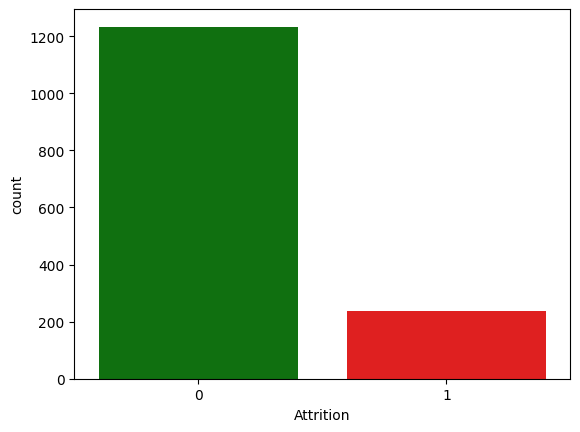

In [20]:
# attrition distrbution 
sns.countplot( x= "Attrition", data=data, palette=["g","r"])

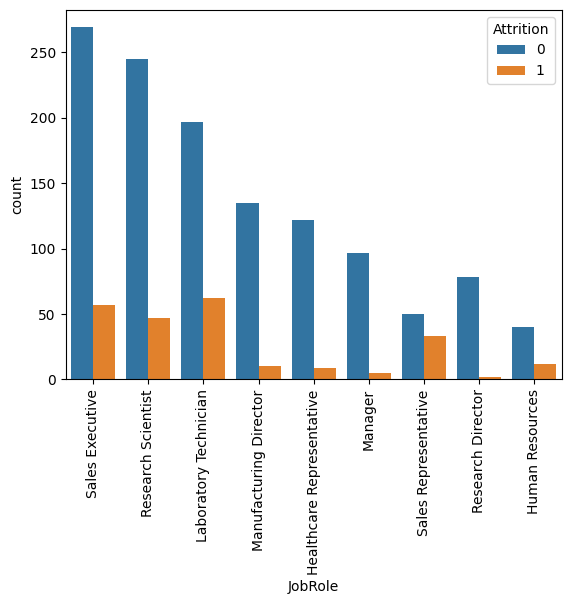

In [21]:
# attrition by jobRole 
sns.countplot(x="JobRole",hue="Attrition",data=data)
plt.xticks(rotation=90)
plt.show()

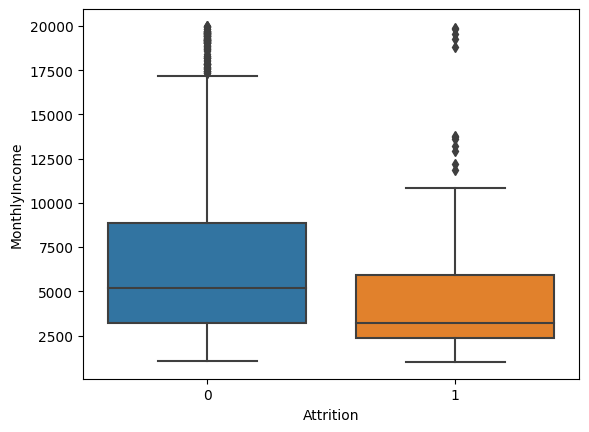

In [22]:
#distribution of monthly income

sns.boxplot(x = "Attrition", y ="MonthlyIncome",data=data)
plt.show()

In [23]:
def hist_with_hue(data, col, hue):
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.title("Distrbution plot")
    sns.histplot(x=col, data=data,hue=hue, kde=True, palette='Set2')

    plt.subplot(1,2,2)
    plt.title("Box plot")
    sns.boxplot(x=hue, y=col, data=data, palette='Set2')
    plt.title(f"Distribution by {col} & {hue}")
    plt.tight_layout()

    plt.show()

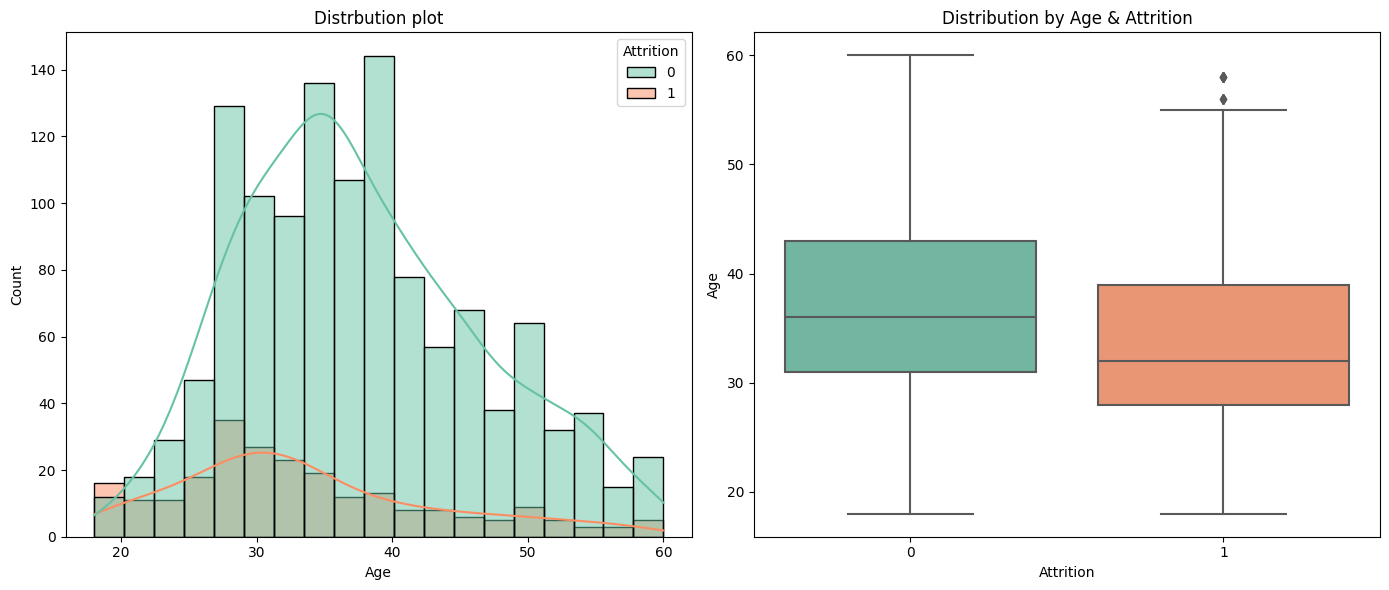

In [24]:
hist_with_hue(data, 'Age', 'Attrition')

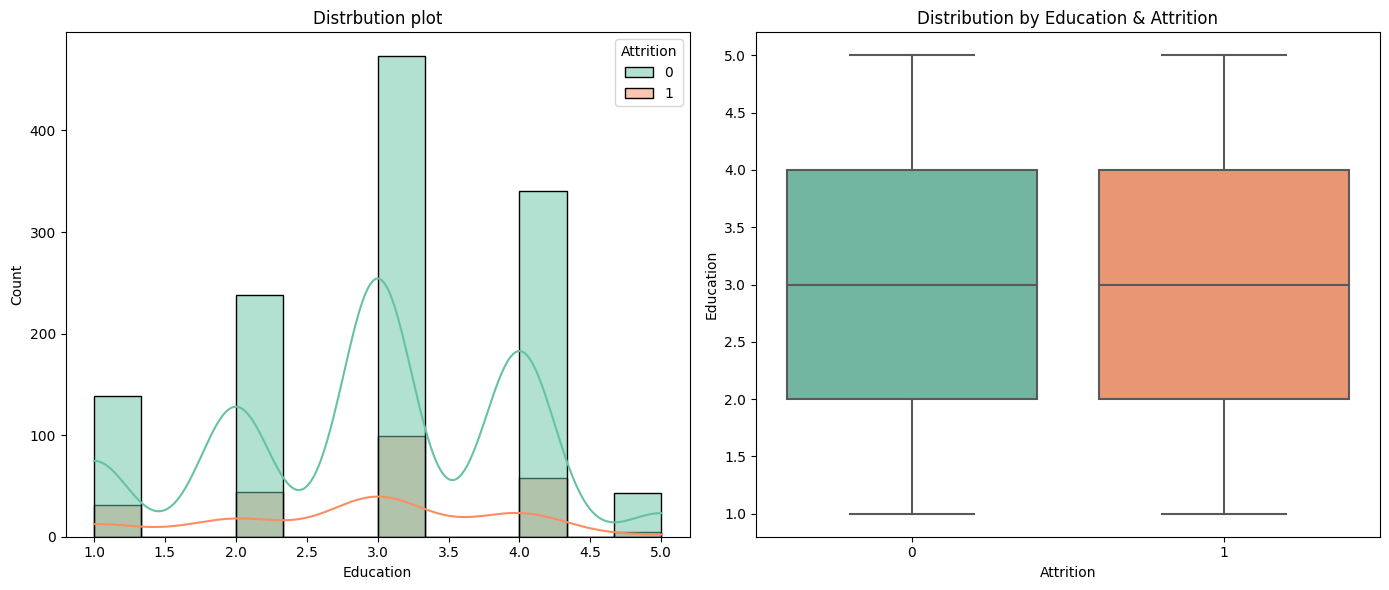

In [25]:
hist_with_hue(data, 'Education', 'Attrition')

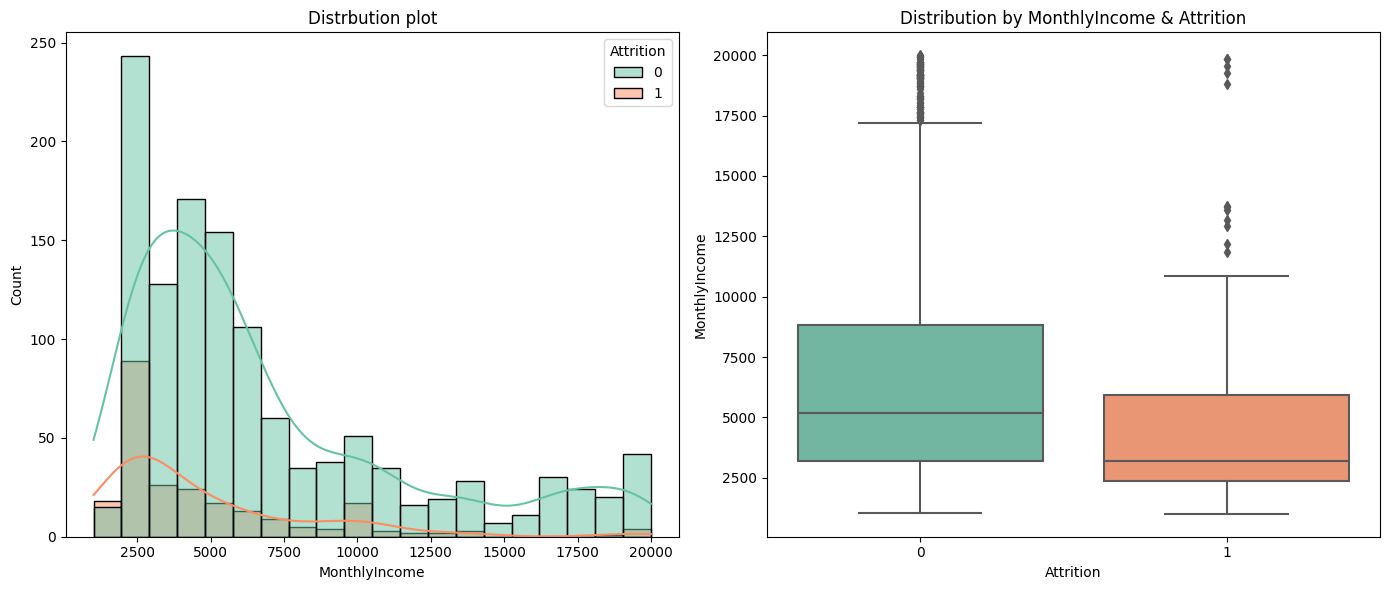

In [26]:
hist_with_hue(data, 'MonthlyIncome', 'Attrition')

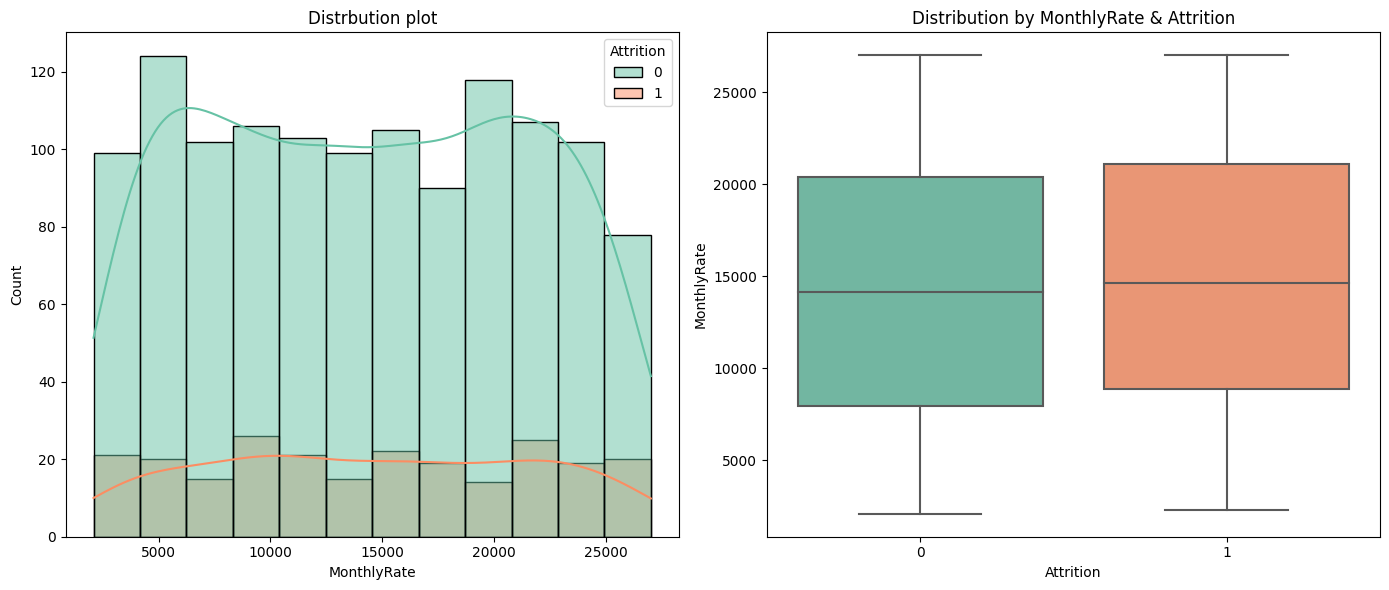

In [27]:
hist_with_hue(data, 'MonthlyRate', 'Attrition')

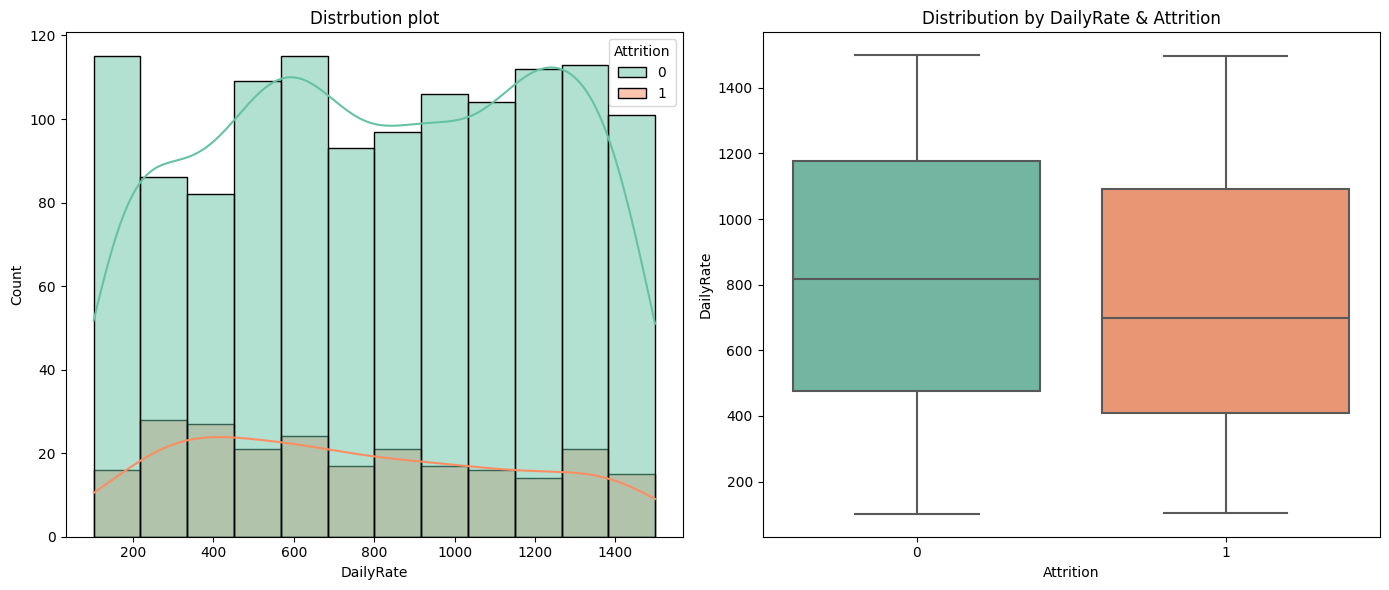

In [28]:
hist_with_hue(data, 'DailyRate', 'Attrition')

**Compare average monthly income by education and attrition**

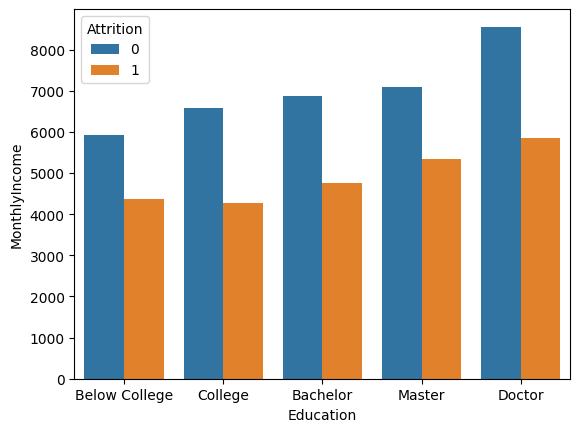

In [29]:
# Does income level or education level contribute to attrition?
income_by_education = data.groupby(['Education', 'Attrition'])['MonthlyIncome'].mean().reset_index()
sns.barplot(x='Education', y='MonthlyIncome', hue='Attrition', data=income_by_education)
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Below College', 'College', 'Bachelor', 'Master', 'Doctor'])
plt.show()

* Employees with higher levels of education earn more and also have more attrition.

**Relationship Between Job Satisfaction and Attrition**


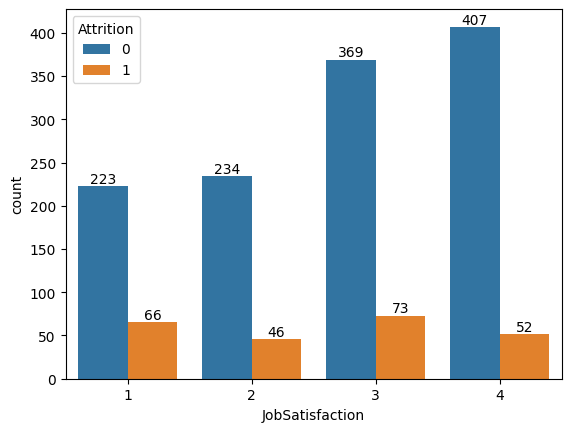

In [30]:
#Are employees with lower job satisfaction more likely to leave?

ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)


for bars in ax.containers:
    ax.bar_label(bars)

* Employees who have a higher level of job satisfaction have the ability to stay in the job, but the attrition rate is close between all levels. For example, at level No. 4, the highest level of satisfaction is not the lowest level of attrition.

**Breakdown of Distance from Home by Job Role and Attrition**

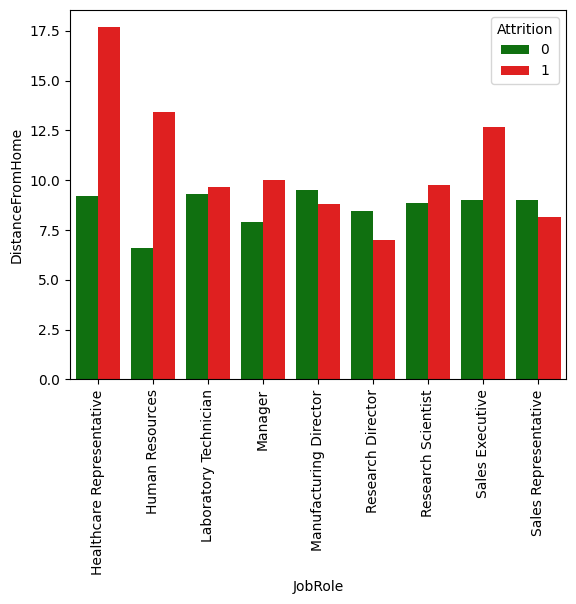

In [31]:
#Do employees who live farther from work have higher attrition, and does this vary by job role?


distance_by_job_role = data.groupby(['JobRole', 'Attrition'])['DistanceFromHome'].mean().reset_index()
ax = sns.barplot(x='JobRole', y='DistanceFromHome', hue='Attrition', data=distance_by_job_role,palette=["g","r"])
plt.xticks(rotation=90)
plt.show()





* We note that due to the distance from home, they may tend to leave work and suffer from a higher attrition rate.

**Compare Monthly Income by Job Role and Attrition**

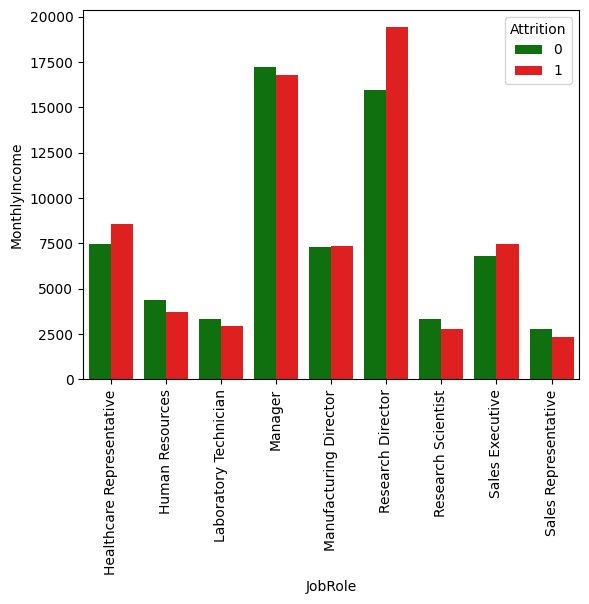

In [32]:
#Are certain job roles paid less, leading to higher attrition?

monthly_income_by_role = data.groupby(['JobRole', 'Attrition'])['MonthlyIncome'].mean().reset_index()
sns.barplot(x='JobRole', y='MonthlyIncome', hue='Attrition', data=monthly_income_by_role,palette=["g","r"])
plt.xticks(rotation=90)
plt.show()

* We note that wages do not have a strong relationship with attrition because it is clear from the figure that high wages have an increase in attrition

Correlation Between Employee Features and Attrition

In [33]:
df = data.copy()

In [34]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le = LabelEncoder()

df["Attrition"] = le.fit_transform(df['Attrition'])

In [35]:
#convert catogrical columns to numarical 

encoder = OneHotEncoder()

data_new = encoder.fit_transform(df[['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime']])

In [36]:
df1 = pd.DataFrame(data_new.toarray(),columns = encoder.get_feature_names_out())

df1 = pd.concat([df, df1],axis=1)
df = df.drop(['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Gender',
 'OverTime'],axis =1)


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   int64
 2   DailyRate                 1470 non-null   int64
 3   DistanceFromHome          1470 non-null   int64
 4   Education                 1470 non-null   int64
 5   EnvironmentSatisfaction   1470 non-null   int64
 6   HourlyRate                1470 non-null   int64
 7   JobInvolvement            1470 non-null   int64
 8   JobLevel                  1470 non-null   int64
 9   JobSatisfaction           1470 non-null   int64
 10  MonthlyIncome             1470 non-null   int64
 11  MonthlyRate               1470 non-null   int64
 12  NumCompaniesWorked        1470 non-null   int64
 13  PercentSalaryHike         1470 non-null   int64
 14  PerformanceRating         1470 non-null 

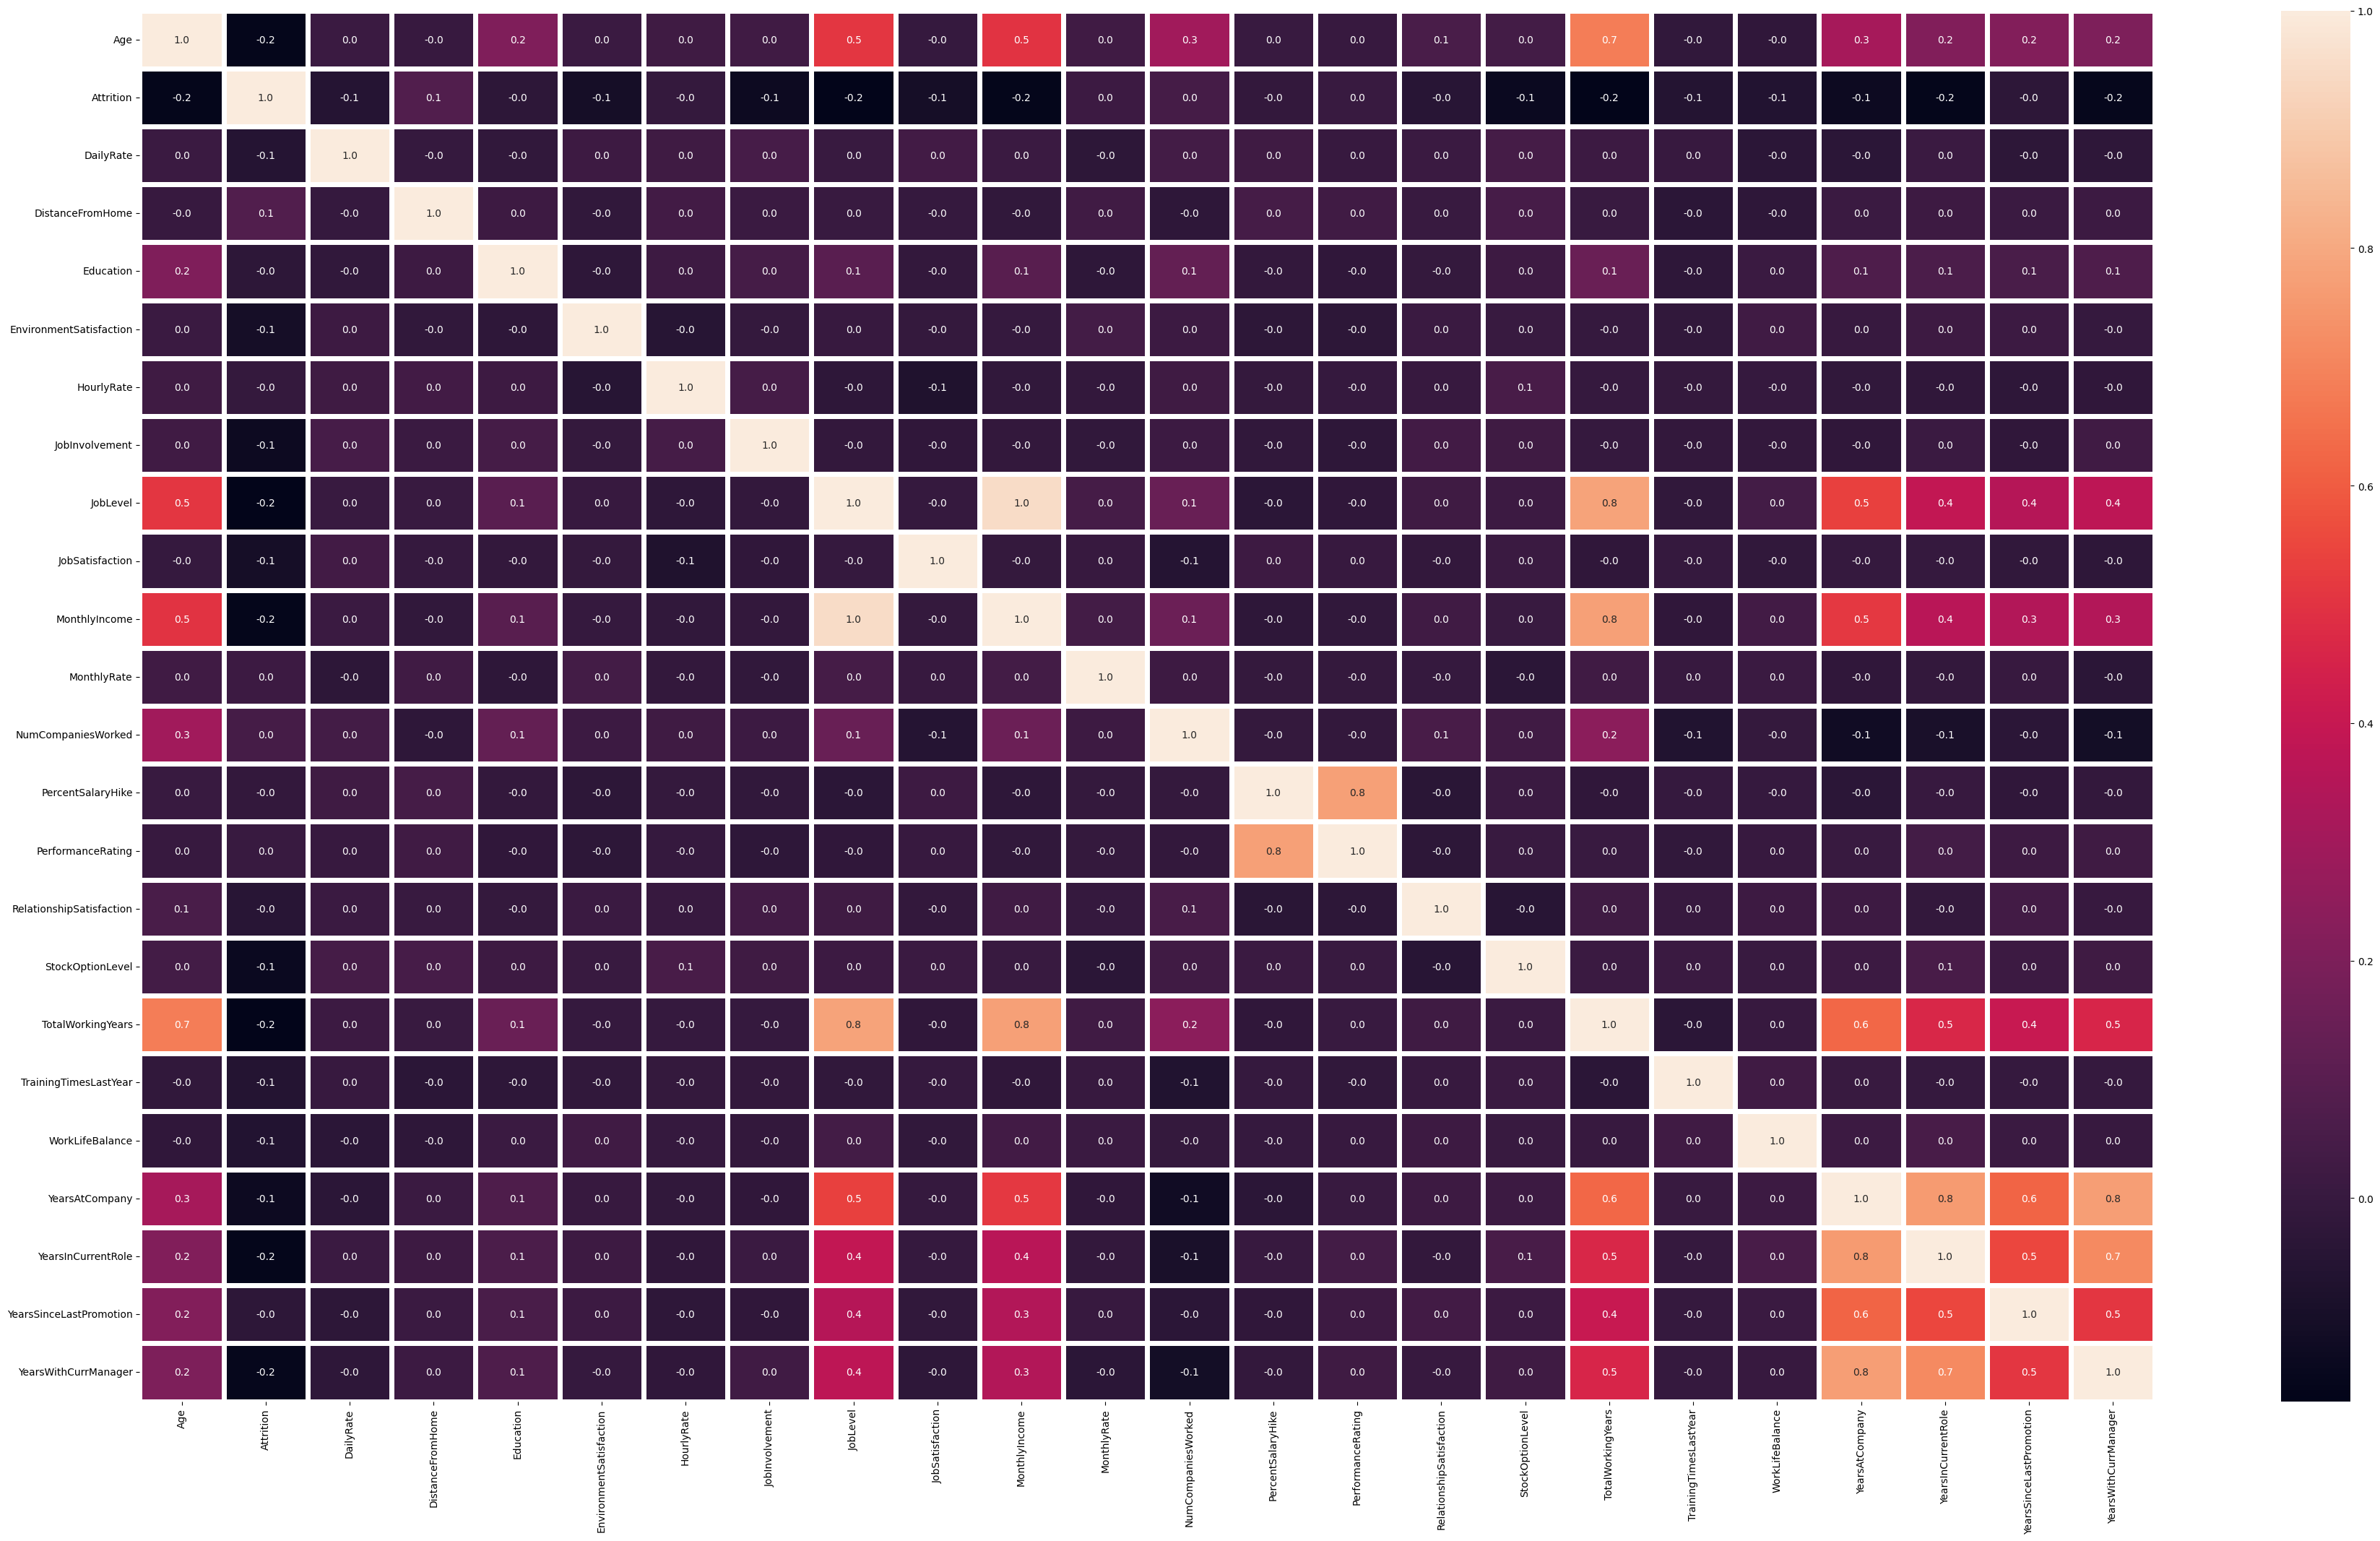

In [37]:
plt.figure(figsize=(45,25))
corr_matrix = df.corr()
sns.heatmap(corr_matrix,annot =True,fmt=".1f",linewidths=5)
plt.show()

* high corrlation JobSatisfaction and TotalWorkingYears         
* MonthlyIncome and TotalWorkingYears

* PercentSalaryHike and PerformanceRating
* YearsWithCurrManager and YearsInCurrentRole and YearsAtCompany,   
etc

**Thank You**